In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv",encoding= "unicode escape")

In [5]:
df.shape

(15433, 11)

In [7]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [11]:
pd.isnull(df).sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [15]:
df.dropna(inplace=True) #removes null values

In [17]:
df.drop(["Country_Code","Event_gender"],axis=1,inplace=True)  #remove the columns which is not useful

In [19]:
df['Year'] = df['Year'].astype(int)  #changes the datatype of year from float to int

Check the above process is completed or not.


In [22]:
pd.isnull(df).sum()

City          0
Year          0
Sport         0
Discipline    0
Event         0
Athlete       0
Gender        0
Country       0
Medal         0
dtype: int64

In [26]:
df.info()    #check the changed datatype
             #check the column is removed or not
             #check the null values

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        15316 non-null  object
 1   Year        15316 non-null  int32 
 2   Sport       15316 non-null  object
 3   Discipline  15316 non-null  object
 4   Event       15316 non-null  object
 5   Athlete     15316 non-null  object
 6   Gender      15316 non-null  object
 7   Country     15316 non-null  object
 8   Medal       15316 non-null  object
dtypes: int32(1), object(8)
memory usage: 1.1+ MB


EDA


In [29]:
q1_data = df[["City", 'Year']]
q1_data = q1_data.drop_duplicates('Year')
q1_data

,City,Year
0,Montreal,1976
1422,Moscow,1980
2809,Los Angeles,1984
4268,Seoul,1988
5814,Barcelona,1992
7519,Atlanta,1996
9378,Sydney,2000
11393,Athens,2004
13391,Beijing,2008


From 1976, no city has hosted olympics twice.

<Axes: xlabel='City'>

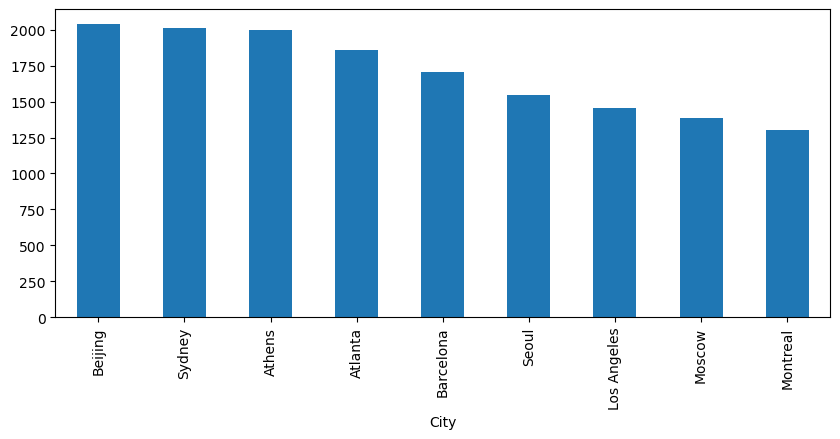

In [34]:
q2_data = df['City'].value_counts()
q2_data.columns = ['City', 'Count']
plt.figure(figsize = (10,4))
q2_data.plot.bar(x = 'City', y = 'Count')

Beijing has hosted the biggest olympics since 1976 till 2008, followed by Sydney and Athens.

In [37]:
q3_data = df[['Sport', 'Discipline','Event']].drop_duplicates()
print("Total number of unique events are held so far are :",len(q3_data))
q3_data

Total number of unique events are held so far are : 334


,Sport,Discipline,Event
0,Aquatics,Diving,3m springboard
4,Aquatics,Diving,10m platform
12,Aquatics,Swimming,4x100m freestyle relay
13,Aquatics,Swimming,400m freestyle
15,Aquatics,Swimming,1500m freestyle
...,...,...,...
15016,Sailing,Sailing,Laser Radial - One Person Dinghy
15020,Sailing,Sailing,Finn - Heavyweight Dinghy
15026,Sailing,Sailing,Laser - One Person Dinghy
15029,Sailing,Sailing,RS:X - Windsurfer


<Axes: xlabel='Sport'>

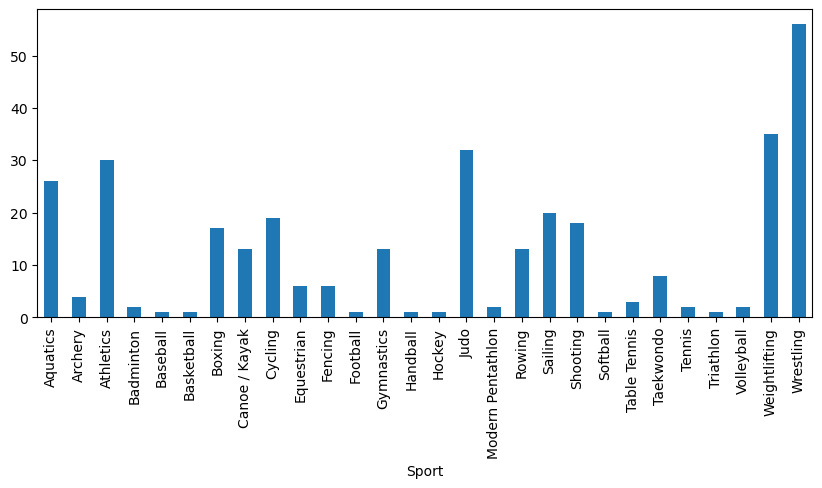

In [39]:
q3_data = q3_data.groupby(['Sport'])['Sport'].size()
plt.figure(figsize = (10,4))
q3_data.plot.bar(x = 'Sport', y = 'Count')

Sports with most events are Wrestling, Weightlifting and Judo.
Total number of unique events are held so far are : 334.

In [42]:
q4_data =df.groupby(['Athlete'])['Athlete'].count().reset_index(name ='Count').sort_values(ascending = False , by = ['Count'])
q4_data = q4_data[:10]

<Axes: xlabel='Athlete'>

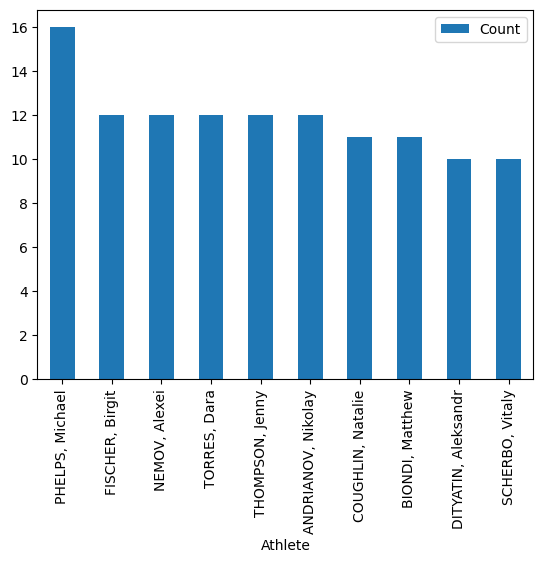

In [44]:
q4_data.plot.bar(x = 'Athlete', y = 'Count')

Michael Phelps won 16 medals during 1976 to 2008. GOAT for a reason.

<Axes: ylabel='Gender'>

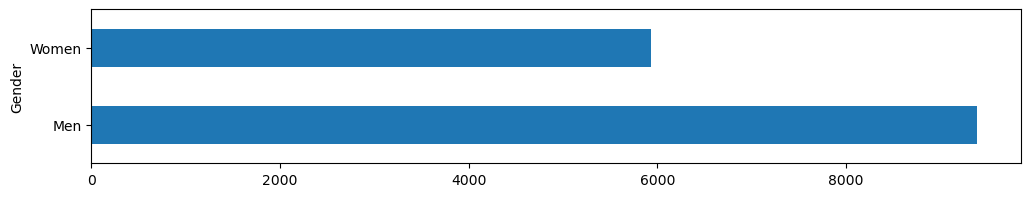

In [47]:
q5_data = df.groupby(['Gender'])['Gender'].count()
plt.figure(figsize = (12,2))
q5_data.plot.barh(x = 'Athlete', y = 'Count')

Seems that there are some events which are made only for male.

In [50]:
q5_data = df[['Event', 'Gender']]
q5_data = q5_data.groupby(['Event','Gender'])['Gender'].count()
q5_data

Event                               Gender
+ 100kg (heavyweight)               Men        16
+ 100kg (super heavyweight)         Men        18
+ 105kg                             Men         9
+ 108kg, total (super heavyweight)  Men         3
+ 110kg, total (super heavyweight)  Men        15
                                             ... 
water polo                          Women     117
épée individual                     Men        27
                                    Women      12
épée team                           Men       114
                                    Women      30
Name: Gender, Length: 379, dtype: int64

There is a huge difference in number of male winner and female  winner implying number of sporting event for male are way more then for female.People like me who thought every sport has both male and famale version , but thats not true :).

In [67]:
q6_data = df[['Year', 'Country', 'Medal']]
q6_data = q6_data.groupby(['Year', 'Country',
'Medal'])['Country'].count().reset_index(name = 'Count')
q6_data['Medal'] = pd.Categorical(q6_data['Medal'],
categories=['Gold', 'Silver', 'Bronze'], ordered=True)
q6_data = q6_data.sort_values(ascending = [True, True, True],by = ['Year', 'Country','Medal'])
q6_data = q6_data.pivot( index = ['Year','Country'], columns =['Medal'], values = ['Count']).reset_index()
q6_data = q6_data.replace(np.nan, 0)
q6_data['Sum'] = q6_data['Count', 'Bronze'] + q6_data['Count','Gold'] + q6_data['Count','Silver']
q6_data = q6_data.sort_values(ascending = [True, False],by =['Year','Sum'])
q6_data.columns = q6_data.columns.droplevel(0)
q6_data.columns = ['Year', 'Country', 'Gold', 'Silver','Bronze', 'Sum']
print(q6_data.Country.unique())
q6_data

['Soviet Union' 'East Germany' 'United States' 'West Germany' 'Poland'
 'Hungary' 'Romania' 'Japan' 'Bulgaria' 'United Kingdom' 'Italy'
 'New Zealand' 'Australia' 'Cuba' 'Canada' 'France' 'Yugoslavia'
 'Korea, South' 'Pakistan' 'Czechoslovakia' 'Netherlands' 'Sweden'
 'Switzerland' 'Belgium' 'Denmark' 'Finland' 'Norway' 'Spain' 'Brazil'
 'Iran' 'Jamaica' 'Korea, North' 'Mexico' 'Portugal' 'Austria' 'Bermuda*'
 'Mongolia' 'Puerto Rico*' 'Thailand' 'Trinidad and Tobago' 'Venezuela'
 'India' 'Zimbabwe' 'Greece' 'Ethiopia' 'Ireland' 'Tanzania' 'Guyana'
 'Lebanon' 'Uganda' 'China' 'Nigeria' 'Kenya' 'Turkey' 'Algeria' 'Morocco'
 'Cameroon' 'Colombia' "Cote d'Ivoire" 'Dominican Republic' 'Egypt'
 'Iceland' 'Peru' 'Syria' 'Taiwan' 'Zambia' 'Argentina' 'Indonesia'
 'Chile' 'Costa Rica' 'Djibouti' 'Netherlands Antilles*' 'Philippines'
 'Senegal' 'Suriname' 'Virgin Islands*' 'Unified team' 'Germany' 'Croatia'
 'Ghana' 'Lithuania' 'Slovenia' 'Estonia'
 'Independent Olympic Participants (1992)' 'La

,Year,Country,Gold,Silver,Bronze,Sum
30,1976,Soviet Union,113.0,93.0,79.0,285.0
10,1976,East Germany,99.0,51.0,42.0,192.0
37,1976,United States,63.0,56.0,36.0,155.0
39,1976,West Germany,21.0,24.0,30.0,75.0
26,1976,Poland,18.0,29.0,26.0,73.0
...,...,...,...,...,...,...
542,2008,Sudan,0.0,1.0,0.0,1.0
548,2008,Togo,0.0,0.0,1.0,1.0
550,2008,Tunisia,1.0,0.0,0.0,1.0
556,2008,Venezuela,0.0,0.0,1.0,1.0


So, I created a interactive solution here.Input the country name from the above list and check its performance over the years.

In [85]:
country_name = input("Enter a country name: ").strip()
country_data = q6_data[q6_data['Country'].str.lower() == country_name.lower()]

if country_data.empty:
    print("Country not found or no medal records.")
else:
    print(country_data)


Enter a country name:  China


     Year Country  Gold  Silver  Bronze    Sum
84   1984   China  26.0    13.0    37.0   76.0
132  1988   China   6.0    16.0    31.0   53.0
185  1992   China  18.0    46.0    19.0   83.0
253  1996   China  19.0    74.0    17.0  110.0
334  2000   China  39.0    23.0    17.0   79.0
411  2004   China  52.0    27.0    15.0   94.0
488  2008   China  74.0    53.0    57.0  184.0


In [87]:
q7_data = df.groupby(['Sport',
'Country'])['Country'].count().reset_index(name ='Count').sort_values(ascending = [True, False],by =['Sport','Count'])
q7_data.Sport.unique()

array(['Aquatics', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Boxing', 'Canoe / Kayak', 'Cycling', 'Equestrian',
       'Fencing', 'Football', 'Gymnastics', 'Handball', 'Hockey', 'Judo',
       'Modern Pentathlon', 'Rowing', 'Sailing', 'Shooting', 'Softball',
       'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Volleyball',
       'Weightlifting', 'Wrestling'], dtype=object)

In [93]:
inp = 'Archery'
try:
    inp = input("Select a Sport from above list")
except:
    print("Input is interrupted")
temp = q7_data[q7_data['Sport'] == inp].head(3)
print(temp)

Select a Sport from above list Volleyball


          Sport        Country  Count
715  Volleyball         Brazil    102
734  Volleyball  United States     98
730  Volleyball   Soviet Union     72


So, here we have an interactive way to see which country has dominated which sports.

->Athelete changed his or her event and still managed to win the medal!

In [98]:
temp = df[['Athlete','Sport']].drop_duplicates()
temp = temp.groupby(['Athlete'])
for k,v in temp:
    if len(v['Sport'].tolist()) >1:
        print(k,v['Sport'].tolist())

('BELOVA, Irina',) ['Athletics', 'Gymnastics']
('CHEN, Jing',) ['Table Tennis', 'Volleyball']
('DIMITROV, Stefan',) ['Volleyball', 'Weightlifting']
('GAVRILOV, Yuri',) ['Football', 'Handball']
('GONZALEZ, Raul',) ['Athletics', 'Handball']
('KOLESNIKOV, Nikolai',) ['Athletics', 'Weightlifting']
('KOVACS, Istvan',) ['Wrestling', 'Boxing']
('KOVALENKO, Alexandre',) ['Athletics', 'Aquatics']
('KUZNETSOV, Mikhail',) ['Rowing', 'Canoe / Kayak']
('KUZNETSOV, Nikolai',) ['Rowing', 'Cycling']
('LEE, Eun Kyung',) ['Archery', 'Hockey']
('LI, Na',) ['Aquatics', 'Fencing']
('LI, Ting',) ['Aquatics', 'Tennis']
('OVCHINNIKOVA, Elena',) ['Volleyball', 'Aquatics']
('ROMERO, Rebecca',) ['Rowing', 'Cycling']
('THOMPSON, Richard',) ['Baseball', 'Athletics']
('TOMA, Sanda',) ['Rowing', 'Canoe / Kayak']
('WANG, Liping',) ['Football', 'Athletics']
('WELLS, Matthew',) ['Hockey', 'Rowing']
('YANG, Wei',) ['Badminton', 'Gymnastics']
('YOUNG, Tim',) ['Rowing', 'Baseball']


So there has been quite a few player who has changed the sport and still won a
medal.

In [103]:
q9_data = q6_data[['Year', 'Country','Sum']].groupby(['Year']).apply(lambda x : x.nlargest(5,'Sum'))
q9_data = q9_data.pivot( index = ['Year'], columns =['Country'], values = ['Sum']).reset_index()
q9_data.columns = q9_data.columns.droplevel(0)    # q9_data.columns = ['Year', 'Country', 'Gold', 'Silver','Bronze', 'Sum']
q9_data = q9_data.rename(columns={ q9_data.columns[0]: "Year"})
q9_data
# temp =q6_data.where(q6_data.Country.isin(q9_data.columns)).dropna()[["Year", "Country", "Sum"]]
# temp

Country,Year,Australia,Bulgaria,Canada,China,Cuba,East Germany,Germany,Hungary,Italy,"Korea, South",Poland,Romania,Russia,Soviet Union,Unified team,United States,West Germany,Yugoslavia
0,1976,NaN,NaN,NaN,NaN,NaN,192.0,NaN,NaN,NaN,NaN,73.0,NaN,NaN,285.0,NaN,155.0,75.0,NaN
1,1980,NaN,94.0,NaN,NaN,NaN,260.0,NaN,61.0,NaN,NaN,NaN,72.0,NaN,442.0,NaN,NaN,NaN,NaN
2,1984,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,333.0,157.0,87.0
3,1988,NaN,NaN,NaN,NaN,NaN,174.0,NaN,NaN,NaN,77.0,NaN,NaN,NaN,294.0,NaN,193.0,113.0,NaN
4,1992,NaN,NaN,NaN,83.0,71.0,NaN,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.0,224.0,NaN,NaN
5,1996,132.0,NaN,NaN,110.0,NaN,NaN,124.0,NaN,NaN,NaN,NaN,NaN,115.0,NaN,NaN,260.0,NaN,NaN
6,2000,183.0,NaN,NaN,79.0,NaN,NaN,119.0,NaN,NaN,NaN,NaN,NaN,188.0,NaN,NaN,248.0,NaN,NaN
7,2004,157.0,NaN,NaN,NaN,NaN,NaN,149.0,NaN,102.0,NaN,NaN,NaN,192.0,NaN,NaN,264.0,NaN,NaN
8,2008,149.0,NaN,NaN,184.0,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,143.0,NaN,NaN,315.0,NaN,NaN


In [105]:
q9_data = q6_data[['Year', 'Country','Sum']].groupby(['Year']).apply(lambda x :x.nlargest(5,'Sum'))['Country'].drop_duplicates()
temp =q6_data.where(q6_data.Country.isin(q9_data)).dropna()[["Year","Country", "Sum"]]
temp = temp.pivot(index = ['Year'], columns = ['Country'],values = ['Sum']).reset_index()
temp.columns = temp.columns.droplevel(0)
temp = temp.rename(columns={ temp.columns[0]: "Year" })
q9_data = temp.replace(np.nan, 0)
q9_data

Country,Year,Australia,Bulgaria,Canada,China,Cuba,East Germany,Germany,Hungary,Italy,"Korea, South",Poland,Romania,Russia,Soviet Union,Unified team,United States,West Germany,Yugoslavia
0,1976.0,24.0,39.0,20.0,0.0,24.0,192.0,0.0,55.0,31.0,17.0,73.0,55.0,0.0,285.0,0.0,155.0,75.0,19.0
1,1980.0,12.0,94.0,0.0,0.0,20.0,260.0,0.0,61.0,37.0,0.0,50.0,72.0,0.0,442.0,0.0,0.0,0.0,57.0
2,1984.0,50.0,0.0,86.0,76.0,0.0,0.0,0.0,0.0,63.0,42.0,0.0,106.0,0.0,0.0,0.0,333.0,157.0,87.0
3,1988.0,34.0,41.0,21.0,53.0,0.0,174.0,0.0,44.0,29.0,77.0,21.0,51.0,0.0,294.0,0.0,193.0,113.0,63.0
4,1992.0,57.0,17.0,44.0,83.0,71.0,0.0,198.0,45.0,46.0,49.0,42.0,53.0,0.0,0.0,223.0,224.0,0.0,0.0
5,1996.0,132.0,21.0,51.0,110.0,57.0,0.0,124.0,43.0,71.0,66.0,21.0,38.0,115.0,0.0,0.0,260.0,0.0,26.0
6,2000.0,183.0,13.0,31.0,79.0,69.0,0.0,119.0,53.0,65.0,73.0,24.0,46.0,188.0,0.0,0.0,248.0,0.0,26.0
7,2004.0,157.0,17.0,17.0,94.0,61.0,0.0,149.0,40.0,102.0,52.0,12.0,39.0,192.0,0.0,0.0,264.0,0.0,0.0
8,2008.0,149.0,5.0,34.0,184.0,47.0,0.0,101.0,27.0,42.0,78.0,20.0,22.0,143.0,0.0,0.0,315.0,0.0,0.0


So these are the top 5 countries in each olympic game. Lets Combine Soviet Union +
Unified Team +Russia and East Germany + West Germany + Germany.

Also lets drop Yugoslavia, Poland, South Korea, Italy, Hungary, Cuba, Canada,
Bulgaria as they are only shown up once in top 5.

In [121]:
q9_data.Germany = q9_data.Germany + q9_data['East Germany'] + q9_data['West Germany']
q9_data.Russia = q9_data['Soviet Union'] + q9_data.Russia + q9_data['Unified team']
q9_data = q9_data.drop(['Yugoslavia','Poland','Korea, South','Italy','Hungary','Cuba','Canada','Bulgaria','East Germany', 'West Germany', 'Soviet Union', 'Unified team'], axis= 1)
q9_data =q9_data.set_index('Year')
q9_data

Country,Australia,China,Germany,Romania,Russia,United States
Year,,,,,,
1976.0,24.0,0.0,1068.0,55.0,1425.0,155.0
1980.0,12.0,0.0,1040.0,72.0,2210.0,0.0
1984.0,50.0,76.0,628.0,106.0,0.0,333.0
1988.0,34.0,53.0,1148.0,51.0,1470.0,193.0
1992.0,57.0,83.0,198.0,53.0,1115.0,224.0
1996.0,132.0,110.0,124.0,38.0,115.0,260.0
2000.0,183.0,79.0,119.0,46.0,188.0,248.0
2004.0,157.0,94.0,149.0,39.0,192.0,264.0
2008.0,149.0,184.0,101.0,22.0,143.0,315.0


Let's plot line graph for this.

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year'>

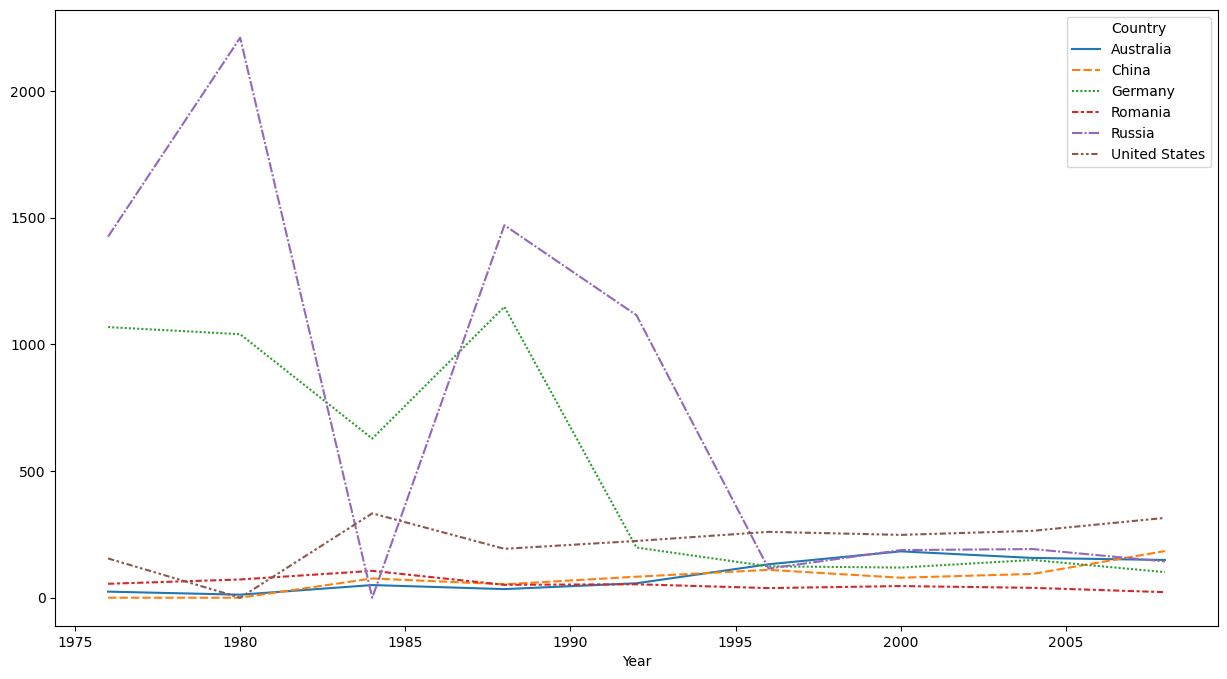

In [134]:
plt.figure(figsize=(15,8))
sns.lineplot(data = q9_data)